A1

Can we determine a pattern from market basket analysis where a certain item will likely cause a customer purchase the next item?

A2

One goal of this analysis is to provide the company with the appropriate information to understand their customers in order to sell the right products to their customers 

B1

Market basket analysis works by finding patterns in transactions that occurr frequently. It is typically stated as 'IF {item1} THEN {item2}. The IF statement is called antecedent and the THEN statement is called the consequent. It is then stated as a probability between that occurance and all the possible transactions.

The expected outcome will be discovering a pattern of items that customers purchase and using that information to market the conseuqent item when the antecedent item is triggered.

B2

Upon observing the first row of the teleco_market_basket dataset, which we can refer as the transaction of items purchased by a customer:

Logitech M510 Wireless mouse	HP 63 Ink	HP 65 ink	nonda USB C to USB Adapter	10ft iPHone Charger Cable	HP 902XL ink	Creative Pebble 2.0 Speakers	Cleaning Gel Universal Dust Cleaner	Micro Center 32GB Memory card	YUNSONG 3pack 6ft Nylon Lightning Cable	TopMate C5 Laptop Cooler pad	Apple USB-C Charger cable	HyperX Cloud Stinger Headset	TONOR USB Gaming Microphone	Dust-Off Compressed Gas 2 pack	3A USB Type C Cable 3 pack 6FT	HOVAMP iPhone charger	SanDisk Ultra 128GB card	FEEL2NICE 5 pack 10ft Lighning cable	FEIYOLD Blue light Blocking Glasses

The transaction above is a list of 20 items.

B3

An assumption for Market basket analysis is the transactional dataset contains relations with each other and that the use of association rules will find the relationship between the items. 

C1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco = pd.read_csv('teleco_market_basket.csv')

In [3]:
telco

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
telco.shape

(15002, 20)

In [5]:
telco.describe()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Dust-Off Compressed Gas 2 pack,Apple USB-C Charger cable,USB 2.0 Printer cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,Apple USB-C Charger cable,Apple USB-C Charger cable,ARRIS SURFboard SB8200 Cable Modem,Brother Genuine High Yield Toner Cartridge,SanDisk Ultra 128GB card,Brother Genuine High Yield Toner Cartridge,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [6]:
telco.isnull().sum()

Item01     7501
Item02     9255
Item03    10613
Item04    11657
Item05    12473
Item06    13138
Item07    13633
Item08    14021
Item09    14348
Item10    14607
Item11    14746
Item12    14848
Item13    14915
Item14    14955
Item15    14977
Item16    14994
Item17    14998
Item18    14998
Item19    14999
Item20    15001
dtype: int64

In [7]:
telco.dropna(how='all', inplace=True)

In [8]:
telco

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,SanDisk 32GB Ultra SDHC card,Vsco 70 pack stickers,SanDisk 128GB microSDXC card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14995,Apple Lightning to Digital AV Adapter,Nylon Braided Lightning to USB cable,Apple Pencil,USB 2.0 Printer cable,ARRIS SURFboard SB8200 Cable Modem,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14997,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


telco.fillna(0, inplace=True)

In [9]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 1 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 1.2+ MB


In [10]:
telco.dropna(subset=['Item01'], inplace=True)
telco_list = telco.T.apply(lambda x: x.dropna().tolist()).tolist()

telco_list

telco_list = []
for i in range(0, 7501):
    telco_list.append([str(telco.values[i, j]) for j in range(0,20)])

telco_list[:1]

In [11]:
telco_cleaned = pd.DataFrame(telco_list)

In [12]:
telco_cleaned

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,UNEN Mfi Certified 5-pack Lightning Cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Cat8 Ethernet Cable,HP 65 ink,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,SanDisk 32GB Ultra SDHC card,Vsco 70 pack stickers,SanDisk 128GB microSDXC card,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,Apple Lightning to Digital AV Adapter,Nylon Braided Lightning to USB cable,Apple Pencil,USB 2.0 Printer cable,ARRIS SURFboard SB8200 Cable Modem,Apple USB-C Charger cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,Falcon Dust Off Compressed Gas,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,HP 63XL Ink,Apple USB-C Charger cable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [13]:
telco_cleaned.columns

RangeIndex(start=0, stop=20, step=1)

In [14]:
telco_cleaned.to_csv('telco_cleaned')

C2

In [15]:
!pip install mlxtend  

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [17]:
encoder = TransactionEncoder()
onehot = encoder.fit(telco_list).transform(telco_list)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)

In [18]:
onehot.to_csv('onehot.csv')

In [19]:
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.001, max_len =3)

In [20]:
rules = association_rules(frequent_itemsets)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(VicTsing Wireless mouse, 10ft iPHone Charger ...",(Dust-Off Compressed Gas 2 pack),0.002000,0.238368,0.001866,0.933333,3.915511,0.001390,11.424477
1,"(5pack Nylon Braided USB C cables, iPhone 11 c...",(HP 63XL Ink),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545
2,"(Cat8 Ethernet Cable, Anker 2-in-1 USB Card Re...",(Dust-Off Compressed Gas 2 pack),0.001733,0.238368,0.001466,0.846154,3.549776,0.001053,4.950607
3,"(Anker 2-in-1 USB Card Reader, TP-Link AC1750 ...",(Screen Mom Screen Cleaner kit),0.001600,0.129583,0.001333,0.833333,6.430898,0.001126,5.222504
4,"(Falcon Dust Off Compressed Gas, Brother Genui...",(VIVO Dual LCD Monitor Desk mount),0.001466,0.174110,0.001200,0.818182,4.699220,0.000945,4.542394
5,"(SanDisk Extreme 256GB card, Cat8 Ethernet Cable)",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
6,"(FEEL2NICE 5 pack 10ft Lighning cable, SanDisk...",(Dust-Off Compressed Gas 2 pack),0.001200,0.238368,0.001067,0.888889,3.729058,0.000781,6.854686
7,"(Premium Nylon USB Cable, SanDisk Ultra 400GB ...",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
8,"(SanDisk Extreme 256GB card, SanDisk Ultra 64G...",(Dust-Off Compressed Gas 2 pack),0.001866,0.238368,0.001600,0.857143,3.595877,0.001155,5.331422
9,"(Screen Mom Screen Cleaner kit, iPhone 11 case)",(Logitech M510 Wireless mouse),0.001866,0.071457,0.001600,0.857143,11.995203,0.001466,6.499800


C3

In [21]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
26,0.238368,(Dust-Off Compressed Gas 2 pack)
12,0.179709,(Apple Pencil)
99,0.174110,(VIVO Dual LCD Monitor Desk mount)
95,0.170911,(USB 2.0 Printer cable)
34,0.163845,(HP 61 ink)
...,...,...
2448,0.001067,"(USB 2.0 Printer cable, 3A USB Type C Cable 3 ..."
2447,0.001067,"(Stylus Pen for iPad, 3A USB Type C Cable 3 pa..."
4722,0.001067,"(HP 61 ink, HP 63 Ink, Nylon Braided Lightning..."
2441,0.001067,"(SanDisk Ultra 128GB card, Logitech M510 Wirel..."


In [22]:
frequent_itemsets[frequent_itemsets['support']>frequent_itemsets.support.nlargest(5).min()]

,support,itemsets
12,0.179709,(Apple Pencil)
26,0.238368,(Dust-Off Compressed Gas 2 pack)
95,0.170911,(USB 2.0 Printer cable)
99,0.174110,(VIVO Dual LCD Monitor Desk mount)


In [23]:
rules = association_rules(frequent_itemsets)

In [24]:
rules.sort_values('consequent support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(VicTsing Wireless mouse, 10ft iPHone Charger ...",(Dust-Off Compressed Gas 2 pack),0.002000,0.238368,0.001866,0.933333,3.915511,0.001390,11.424477
2,"(Cat8 Ethernet Cable, Anker 2-in-1 USB Card Re...",(Dust-Off Compressed Gas 2 pack),0.001733,0.238368,0.001466,0.846154,3.549776,0.001053,4.950607
5,"(SanDisk Extreme 256GB card, Cat8 Ethernet Cable)",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
6,"(FEEL2NICE 5 pack 10ft Lighning cable, SanDisk...",(Dust-Off Compressed Gas 2 pack),0.001200,0.238368,0.001067,0.888889,3.729058,0.000781,6.854686
7,"(Premium Nylon USB Cable, SanDisk Ultra 400GB ...",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
8,"(SanDisk Extreme 256GB card, SanDisk Ultra 64G...",(Dust-Off Compressed Gas 2 pack),0.001866,0.238368,0.001600,0.857143,3.595877,0.001155,5.331422
4,"(Falcon Dust Off Compressed Gas, Brother Genui...",(VIVO Dual LCD Monitor Desk mount),0.001466,0.174110,0.001200,0.818182,4.699220,0.000945,4.542394
11,"(Stylus Pen for iPad, SanDisk 128GB card)",(VIVO Dual LCD Monitor Desk mount),0.002133,0.174110,0.001733,0.812500,4.666587,0.001362,4.404746
3,"(Anker 2-in-1 USB Card Reader, TP-Link AC1750 ...",(Screen Mom Screen Cleaner kit),0.001600,0.129583,0.001333,0.833333,6.430898,0.001126,5.222504
10,"(SanDisk Ultra 128GB card, SAMSUNG 128GB card)",(Screen Mom Screen Cleaner kit),0.001466,0.129583,0.001200,0.818182,6.313973,0.001010,4.787295


In [25]:
rules.to_csv('rules1')

In [26]:
print(rules['antecedent support'].min(), rules['antecedent support'].max())
print(rules['consequent support'].min(), rules['consequent support'].max())
print(rules['confidence'].min(), rules['confidence'].max())
print(rules['lift'].min(), rules['lift'].max())

0.0011998400213304892 0.0026663111585121984
0.07145713904812692 0.23836821757099053
0.8125 0.95
3.4324283099450885 11.995202558635395


<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

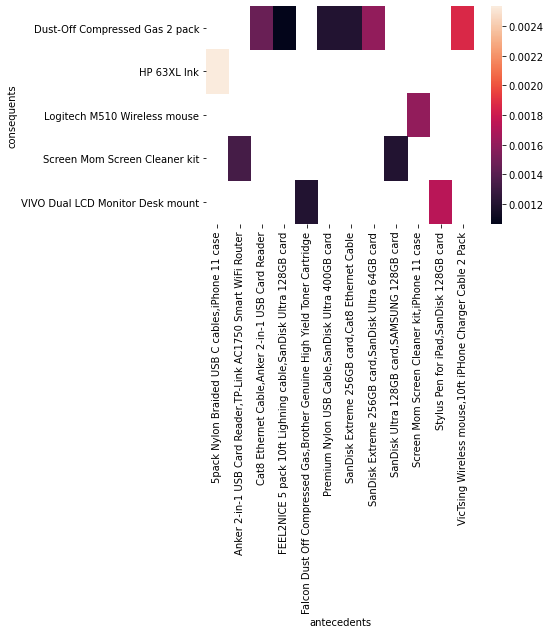

In [27]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)

!pip install apyori
from apyori import apriori

rule_list = list(rule_list)
print(rule_list[0])

print(len(rule_list))

results = pd.DataFrame(rule_list)

C4

D1

D2

D3

E

F

G

H